In [406]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
from matplotlib import pyplot as plt

## loading training and test data fom train.csv and test.csv

In [407]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_ids = test["PassengerId"]
data['Age'].replace('NaN',np.nan)
test['Age'].replace('NaN',np.nan)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [408]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [409]:
data.shape

(891, 12)

## Analysing data to look for less significant and more significant features

In [410]:
data.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [411]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [412]:
data.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",male,1601,G6,S
freq,1,577,7,4,644


#### From above it is clear that most of the cabin values are null and very few are unique making it less significant

#### Looking at  the ratio of survivors among different categories of  categorical columns 

In [413]:
data[["Pclass","Survived"]].groupby(['Pclass'] ,as_index = False).mean().sort_values(by = 'Survived',ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [414]:
data[['Sex','Survived']].groupby(['Sex'],as_index = False).mean().sort_values(by = 'Survived',ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


#### Females have more chances of survival 

In [415]:
data[['Parch','Survived']].groupby(['Parch'],as_index = False).mean().sort_values(by = 'Survived',ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [416]:
data[['SibSp','Survived']].groupby(['SibSp'],as_index = False).mean().sort_values(by = 'Survived',ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


#### As age has  continuous numerical value using histogram to observe distribution of age over survival 

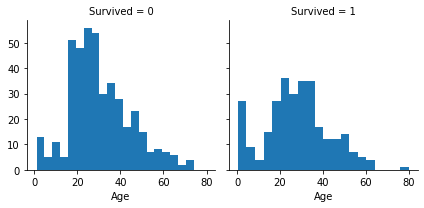

In [417]:
g = sns.FacetGrid(data,col = 'Survived')
g.map(plt.hist,'Age',bins = 20)

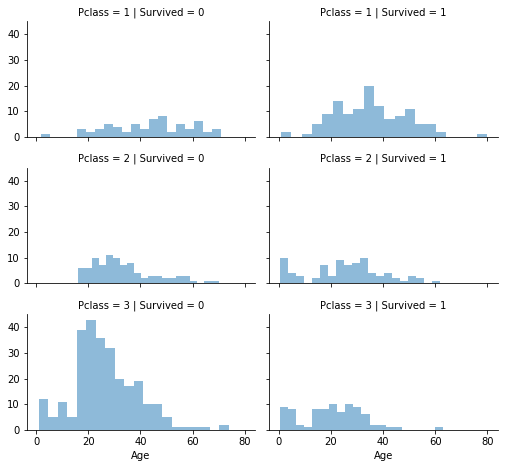

In [418]:
grid = sns.FacetGrid(data, col = 'Survived', row = 'Pclass',height = 2.2,aspect = 1.6)
grid.map(plt.hist,'Age',alpha = 0.5,bins = 20)
grid.add_legend()

#### Histograms representing distribution age groups which survived or died in different Pclasses

c:\users\mahab\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\mahab\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


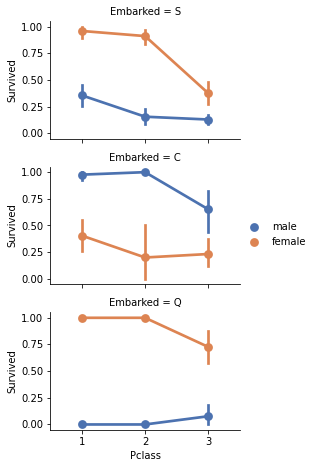

In [419]:
grid1 = sns.FacetGrid(data,row = 'Embarked',height = 2.2,aspect = 1.6)
grid1.map(sns.pointplot,'Pclass','Survived','Sex',palette = 'deep')
grid1.add_legend()

#### In the above plot only in embarked C more males survived as compared to females

c:\users\mahab\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


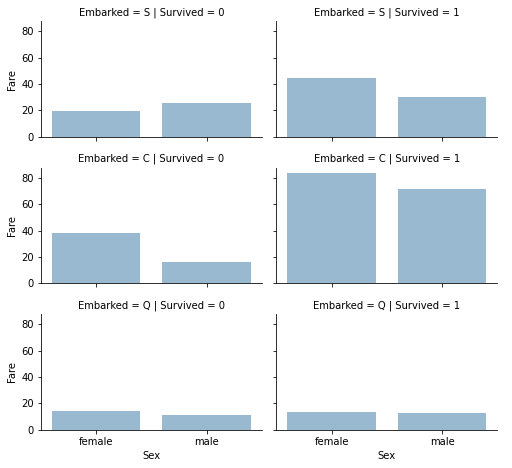

In [420]:
grid2 = sns.FacetGrid(data,row = 'Embarked',col = 'Survived',height = 2.2 ,aspect = 1.6)
grid2.map(sns.barplot,'Sex','Fare',alpha = 0.5,ci = None)
grid2.add_legend()

#### Comparing fare to survival ...... high  fare indicates more chances of survival 

In [421]:
data = data.drop(['Ticket','Cabin'],axis = 1)
test = test.drop(['Ticket','Cabin'],axis = 1)

#### Dropping less significant features Cabin and Ticket ...Ticket is less significant as most of the  passengers have unique ticket

In [422]:
test['Title'] = test.Name.str.extract('([A-Za-z]+)\.',expand = False)
data['Title'] = data.Name.str.extract('([A-Za-z]+)\.',expand = False)
pd.crosstab(data['Title'],data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [423]:
data['Title'] = data['Title'].replace(['Lady','Capt','Col','Countess','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
data['Title'] = data['Title'].replace('Mlle','Miss')
data['Title'] = data['Title'].replace('Ms','Miss')
data['Title'] = data['Title'].replace('Mme','Mrs')
test['Title'] = test['Title'].replace(['Lady','Capt','Col','Countess','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
test['Title'] = test['Title'].replace('Mlle','Miss')
test['Title'] = test['Title'].replace('Ms','Miss')
test['Title'] = test['Title'].replace('Mme','Mrs')
data[['Title','Survived']].groupby(['Title'],as_index = False).mean()


,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [424]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
data['Title'] = data['Title'].map(title_mapping)
data['Title'] = data['Title'].fillna(0)
test['Title'] = test['Title'].map(title_mapping)
test['Title'] = test['Title'].fillna(0)
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [425]:
data = data.drop(['Name','PassengerId'],axis = 1)
test = test.drop(['Name','PassengerId'],axis = 1)

#### Titles like Mr,Miss,Mrs,Master affect the survival therefore creating title column and further categorising them into 5 integers 

#### Once title has been made there is no use of name thus dropping it ...passengerId is any way not of any use (unique for everyone)

In [426]:
data['Sex'] = data['Sex'].map({'female':1,'male':0}).astype(int)

#### Converting sex categories to integer values

In [427]:
test['Sex'] = test['Sex'].map({'female':1,'male':0}).astype(int)

data.head(5)

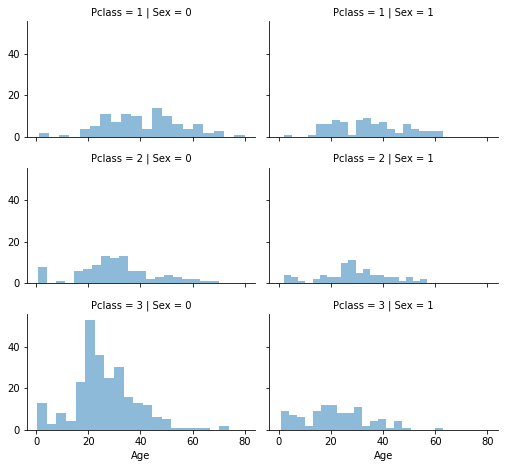

In [429]:
grid3 = sns.FacetGrid(data,row = 'Pclass',col = 'Sex',height = 2.2 ,aspect = 1.6)
grid3.map(plt.hist,'Age',alpha = 0.5,bins = 20)
grid3.add_legend()

#### To observe relationship between age ,Pclass and sex

In [430]:
guess_ages_data = np.zeros((2,3))
guess_ages_test = np.zeros((2,3))
test.shape

(418, 8)

#### As age is having some nan values so inorder to fill nan use medain value of age of passengers of same sex and same Pclass

In [431]:
for i in range(0,2):
    for j in range(0,3):
        guess_data = data.loc[(data['Sex'] == i) & (data['Pclass'] == j+1)]['Age'].dropna()
        guess_test = test.loc[(test['Sex'] == i) & (test['Pclass'] == j+1)]['Age'].dropna()
        age_guess1 = guess_data.median()
        age_guess2 = guess_test.median()
        guess_ages_data[i,j] = int(age_guess1/0.5 +0.5)*0.5
        guess_ages_test[i,j] = int(age_guess2/0.5 +0.5)*0.5
        
for i in range(0,891):
    if(np.isnan(data.iloc[i]['Age']) == True):
        x = data.iloc[i]['Sex']
        y = data.iloc[i]['Pclass']-1
        data.iloc[i, data.columns.get_loc('Age')] =  guess_ages_data[x][y]

for i in range(0,418):
    if(np.isnan(test.iloc[i]['Age']) == True):
        x = test.iloc[i]['Sex']
        y = test.iloc[i]['Pclass']-1
        test.iloc[i, test.columns.get_loc('Age')]  = guess_ages_test[x][y]
data['Age'] = data['Age'].astype(int)
test['Age'] = test['Age'].astype(int)
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1
5,0,3,0,25,0,0,8.4583,Q,1
6,0,1,0,54,0,0,51.8625,S,1
7,0,3,0,2,3,1,21.0750,S,4
8,1,3,1,27,0,2,11.1333,S,3
9,1,2,1,14,1,0,30.0708,C,3


#### Dividing age into 5 groups and assigning each passenger age according to group

In [432]:
data['AgeBand'] = pd.cut(data['Age'], 5)
data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [433]:
data.loc[ data['Age'] <= 16, 'Age'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
data.loc[ data['Age'] > 64, 'Age']  = 4
test.loc[ test['Age'] <= 16, 'Age'] = 0
test.loc[(test['Age'] > 16) & (test['Age'] <= 32), 'Age'] = 1
test.loc[(test['Age'] > 32) & (test['Age'] <= 48), 'Age'] = 2
test.loc[(test['Age'] > 48) & (test['Age'] <= 64), 'Age'] = 3
test.loc[ test['Age'] > 64, 'Age'] = 4

In [434]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"
5,0,3,0,1,0,0,8.4583,Q,1,"(16.0, 32.0]"
6,0,1,0,3,0,0,51.8625,S,1,"(48.0, 64.0]"
7,0,3,0,0,3,1,21.0750,S,4,"(-0.08, 16.0]"
8,1,3,1,1,0,2,11.1333,S,3,"(16.0, 32.0]"
9,1,2,1,0,1,0,30.0708,C,3,"(-0.08, 16.0]"


In [435]:
data = data.drop(['AgeBand'], axis=1)

In [436]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1
5,0,3,0,1,0,0,8.4583,Q,1
6,0,1,0,3,0,0,51.8625,S,1
7,0,3,0,0,3,1,21.0750,S,4
8,1,3,1,1,0,2,11.1333,S,3
9,1,2,1,0,1,0,30.0708,C,3


#### Combining siblings,parent,children into one column familysize

In [437]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


#### Creating isalone column signifying if the passenger had siblings or parent or children or was alone

In [438]:
data['IsAlone'] = 0
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1
test['IsAlone'] = 0
test.loc[test['FamilySize'] == 1, 'IsAlone'] = 1
data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()


,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [439]:
data = data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
data.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1
5,0,3,0,1,8.4583,Q,1,1
6,0,1,0,3,51.8625,S,1,1
7,0,3,0,0,21.0750,S,4,0
8,1,3,1,1,11.1333,S,3,0
9,1,2,1,0,30.0708,C,3,0


#### Creating new feature age*class to combine age and Pclass

In [440]:
data['Age*Class'] = data.Age * data.Pclass
test['Age*Class'] = test.Age * test.Pclass
data.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [441]:
mf = data.Embarked.dropna().mode()[0]

#### Filling null data with most frequent embarked value 

In [442]:
data['Embarked'] = data['Embarked'].fillna(mf)
test['Embarked'] = test['Embarked'].fillna(mf)
data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


#### labelling embarked S as 0 ,C as 1 and Q as 2

In [443]:
data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test['Embarked'] = test['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

In [444]:
data.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


#### As done with age similarly dividing fare into 4 categories  and assigning each passenger fare value category accordingly

In [445]:
data['FareBand'] = pd.qcut(data['Fare'], 4)
data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [446]:
data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
data.loc[ data['Fare'] > 31, 'Fare'] = 3
data['Fare'] = data['Fare'].astype(int)
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)
test.loc[ test['Fare'] <= 7.91, 'Fare'] = 0
test.loc[(test['Fare'] > 7.91) & (test['Fare'] <= 14.454), 'Fare'] = 1
test.loc[(test['Fare'] > 14.454) & (test['Fare'] <= 31), 'Fare']   = 2
test.loc[ test['Fare'] > 31, 'Fare'] = 3
test['Fare'] = test['Fare'].astype(int)
data = data.drop(['FareBand'], axis=1)

In [447]:
data.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [448]:
test.head(10)

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,2,0,2,1,1,6
1,3,1,2,0,0,3,0,6
2,2,0,3,1,2,1,1,6
3,3,0,1,1,0,1,1,3
4,3,1,1,1,0,3,0,3
5,3,0,0,1,0,1,1,0
6,3,1,1,0,2,2,1,3
7,2,0,1,2,0,1,0,2
8,3,1,1,0,1,3,1,3
9,3,0,1,2,0,1,0,3


#### Creating training  and validation set out of initial given training data 

In [449]:
from sklearn.model_selection import train_test_split
Y = data["Survived"]
X = data.drop("Survived",axis = 1)
X_train, X_val,Y_train,Y_val = train_test_split(X,Y,test_size=0.2,random_state = 42)

#### Using Logistic regression to classify test set 

In [450]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 0,max_iter = 1000).fit(X_train,Y_train)

In [457]:
predictions1 = clf.predict(X_val)
from sklearn.metrics import accuracy_score
submission_pred1 = clf.predict(test)
df = pd.DataFrame({"PassengerId": test_ids.values,"Survived":submission_pred1})
df.to_csv("submission_l.csv",index = False)
accuracy_score(Y_val,predictions1)

0.7932960893854749

#### Using DecisionTreeClassifier to predict test set 

In [456]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
predictions2 = decision_tree.predict(X_val)
from sklearn.metrics import accuracy_score
submission_pred2 = clf.predict(test)
df = pd.DataFrame({"PassengerId": test_ids.values,"Survived":submission_pred2})
df.to_csv("submission_d.csv",index = False)
accuracy_score(Y_val,predictions2)

0.8212290502793296

#### Using Linear SVM to predict on test set

In [458]:
from sklearn.svm import SVC, LinearSVC
linear_svc = LinearSVC(max_iter = 10000)
linear_svc.fit(X_train, Y_train)
predictions3 = linear_svc.predict(X_val)
from sklearn.metrics import accuracy_score
submission_pred3 = clf.predict(test)
df = pd.DataFrame({"PassengerId": test_ids.values,"Survived":submission_pred3})
df.to_csv("submission_s.csv",index = False)
accuracy_score(Y_val,predictions3)

0.776536312849162

#### Using KNeighbors to predict on test set

In [459]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =5)
knn.fit(X_train, Y_train)
predictions4 = knn.predict(X_val)
from sklearn.metrics import accuracy_score
submission_pred4 = clf.predict(test)
df = pd.DataFrame({"PassengerId": test_ids.values,"Survived":submission_pred4})
df.to_csv("submission_k.csv",index = False)
accuracy_score(Y_val,predictions4)

0.8379888268156425

#### Using randomforest to predict on test set

In [460]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train, Y_train)
predictions5 = random_forest.predict(X_val)
from sklearn.metrics import accuracy_score
submission_pred5 = clf.predict(test)
df = pd.DataFrame({"PassengerId": test_ids.values,"Survived":submission_pred5})
df.to_csv("submission_r.csv",index = False)
accuracy_score(Y_val,predictions5)

0.8156424581005587

### With above modelling Knn with 5 neighbors gives the best result followed by DecisionTreeClassifier ,RandomForest,Logistic Regression,Linear SVM